#Лабораторна робота №4. Кластеризація даних різної форми алгоритмами навчання без вчителя. Оцінка якості результатів кластеризації


**Виконала** студентка групи КІ-41мп Додонова Марія.  
**Варіант 10.**

##Завдання

1. Опрацювати матеріали уроків U-11-17.
2. Представити початковi данi графiчно.
3. Побудувати модель кластеризацiї згiдно з варiантом.
4. Виконати кластеризацiю даних на основi моделi.
5. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
6. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до ста тисяч i бiльше).
7. Побудувати кiлька альтернативних моделей:
* шляхом змiни значень параметрiв основної моделi,
* використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити,
* задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.
8. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом):
* Estimated Number of Clusters.
* Adjusted Rand Index.
* Adjusted Mutual Information.
* Homogeneity.
* Completeness.
* V-measure.
* Silhouette Coefficient.
* Calinski-Harabasz Index.
* Davies-Bouldin index.
* Contingency Matrix.
9. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом):
* чи є розбиття стабiльним на пiдвибiрках даних,
* чи є розбиття стабiльним пiсля видалення окремих об’єктiв,
* чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi
об’єктiв,
* чи iснує взаємозв’язок мiж результатами кластеризацiї i змiнними,
якi не враховувалися при кластеризацiї,
* чи можна iнтерпретувати результати кластеризацiї.
10. Вищенаведенi пункти виконати для заданих двох наборiв даних рiзної
форми.
11. Зробити висновки про якiсть роботи моделей на дослiджених даних та про швидкодiю методу.
12. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. У кожному варiантi задано два набори даних. Спробувати пiдiбрати найкращу модель кластеризацiї для кожного набору даних.

###Завдання варіанту 10

Алгоритм Mean Shift. Вiдобразити графiчно центри кластерiв.  
Метрики якостi: Estimated number of clusters, Adjusted Rand Index, Adjusted Mutual Information, Silhouette Coefficient.  
Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?  
Початковi данi:  
(а) `sklearn.datasets.samples_generator.make_circles`  
`X, y = make_circles(10000, factor=.1, noise=.1)`  
(б) `from sklearn.datasets import make_blobs`  
`from sklearn.preprocessing import StandardScaler`  
`centers = [[1, 1], [−1, −1], [1, −1]]`  
`X1, labels_true = make_blobs(n_samples=10000, centers=centers, cluster_std=0.4, random_state=0)`  
`X = StandardScaler().fit_transform(X1)`


##Виконання роботи

###Графічне представлення початкових даних

Створимо обидва набори даних відповідно до завдання варіанту 10.

In [ ]:
from sklearn.datasets import make_circles, make_blobs
from sklearn.preprocessing import StandardScaler

# Initial data (a)
X_circles, y_circles = make_circles(10_000, factor=0.1, noise=0.1)

# Initial data (b)
cluster_centers_blobs = [[1, 1], [-1, -1], [1, -1]]
scaler = StandardScaler()
X_blobs, y_blobs = make_blobs(
    n_samples=10_000, centers=cluster_centers_blobs,
    cluster_std=0.4, random_state=0
)
X_blobs = scaler.fit_transform(X_blobs)

Представимо початковi данi графiчно.

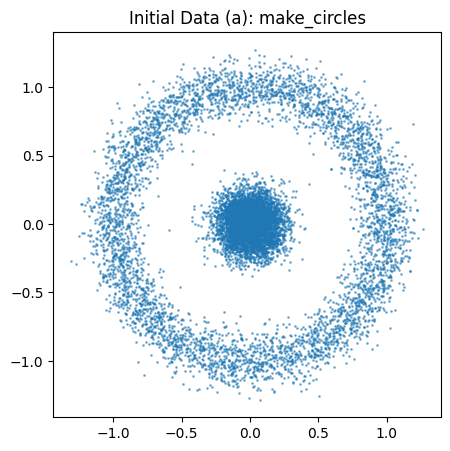

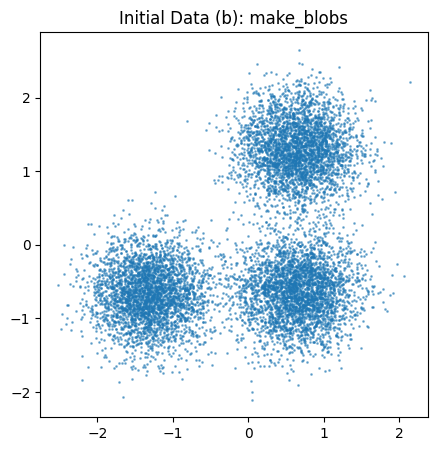

In [ ]:
import matplotlib.pyplot as plt

def plot_initial_data(X, title):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.5)
    plt.title(title)
    plt.show()

plot_initial_data(X_circles, "Initial Data (a): make_circles")
plot_initial_data(X_blobs, "Initial Data (b): make_blobs")

###Модель кластеризацiї

Побудуємо модель кластеризації згідно з варіантом 10: алгоритм Mean Shift.

In [ ]:
from sklearn.cluster import MeanShift

model = MeanShift()

###Кластеризацiя даних на основi моделi

Виконаємо кластеризацію даних на основі побудованої моделі.

In [ ]:
import numpy as np

labels_circles_pred = model.fit_predict(X_circles)
centers_circles_pred = model.cluster_centers_

labels_blobs_pred = model.fit_predict(X_blobs)
centers_blobs_pred = model.cluster_centers_

print("Number of estimated clusters in data:")
print("(a) Circles:", len(np.unique(labels_circles_pred)))
print("(b) Blobs:", len(np.unique(labels_blobs_pred)))

Number of estimated clusters in data:
(a) Circles: 7
(b) Blobs: 3


###Графічне представлення розбиття на кластери

Представимо розбиття на кластери графiчно, рiзними кольорами. Також відобразимо центри кластерів.

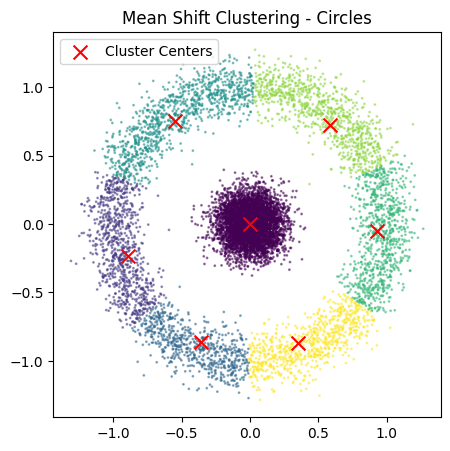

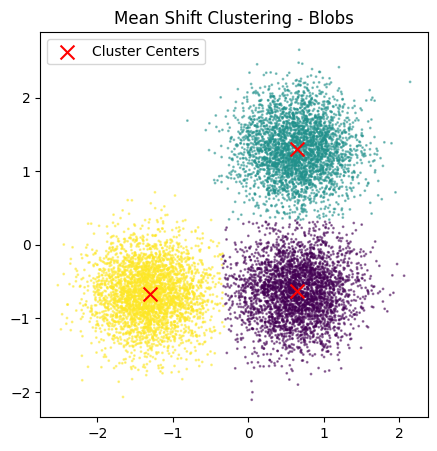

In [ ]:
def plot_clustered_data(X, labels, cluster_centers, dataset_name):
  plt.figure(figsize=(5, 5))
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=1, alpha=0.5)
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
              c='red', marker='x', s=100, label='Cluster Centers')
  plt.title(f'Mean Shift Clustering - {dataset_name}')
  plt.legend()
  plt.show()

plot_clustered_data(X_circles, labels_circles_pred,
                    centers_circles_pred, "Circles")
plot_clustered_data(X_blobs, labels_blobs_pred,
                    centers_blobs_pred, "Blobs")

###Розрахунок часу кластеризацiї та оцiнка швидкодiї методу на надвеликих наборах даних

Розрахуємо час кластеризацiї. Оцiнимо швидкодiю методу при збiльшеннi кiлькостi точок даних.

Clustering time for 10000 samples
Circles: 66.69 seconds
Blobs: 46.22 seconds


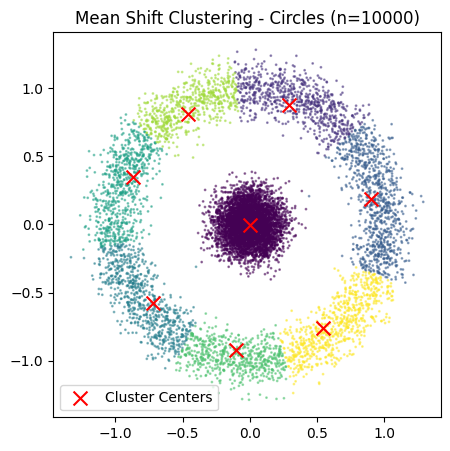

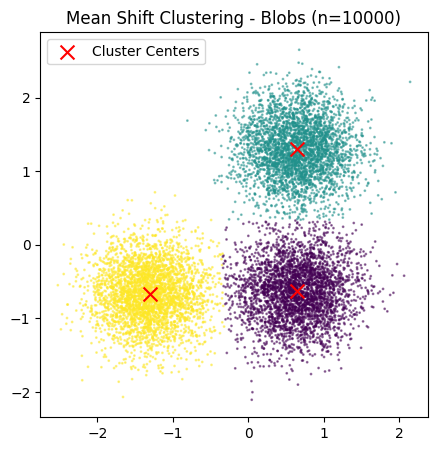

Clustering time for 20000 samples
Circles: 217.64 seconds
Blobs: 125.38 seconds


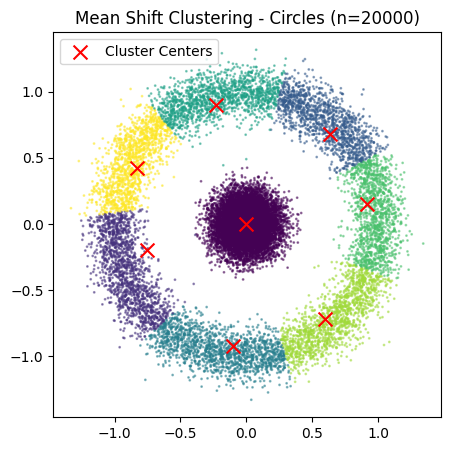

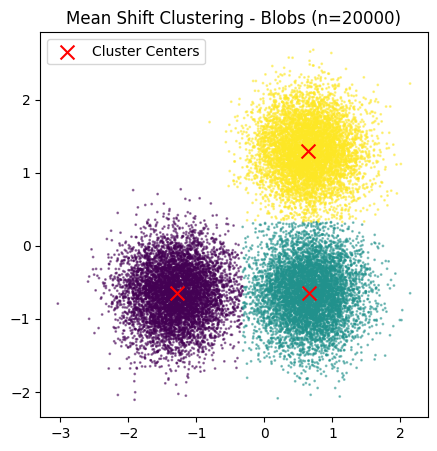

Clustering time for 50000 samples
Circles: 912.49 seconds
Blobs: 588.70 seconds


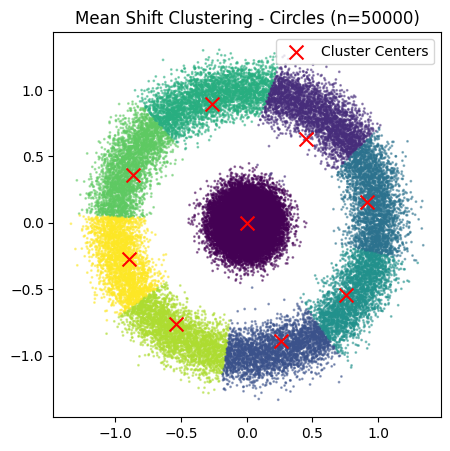

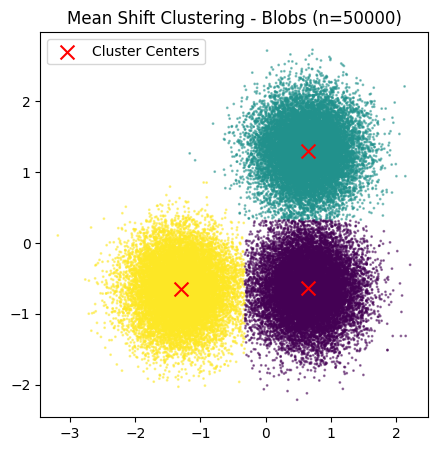

In [ ]:
import time

def measure_runtime(X):
  start_time = time.time()
  model = MeanShift()
  labels = model.fit_predict(X)
  end_time = time.time()
  runtime = end_time - start_time

  return labels, runtime, model.cluster_centers_

sample_sizes = [10000, 20000, 50000]

time_results_circles, time_results_blobs = [], []

for size in sample_sizes:
  print(f"Clustering time for {size} samples")

  # Circles data
  X_circles_n, _ = make_circles(n_samples=size, factor=0.1, noise=0.1)

  # Blobs data
  X_blobs_n, _ = make_blobs(
      n_samples=size, centers=cluster_centers_blobs,
      cluster_std=0.4, random_state=0
  )
  X_blobs_n = scaler.fit_transform(X_blobs_n)

  labels_circles, time_circles, centers_circles = measure_runtime(X_circles_n)
  labels_blobs, time_blobs, centers_blobs = measure_runtime(X_blobs_n)

  time_results_circles.append(time_circles)
  time_results_blobs.append(time_blobs)

  print(f"Circles: {time_circles:.2f} seconds")
  print(f"Blobs: {time_blobs:.2f} seconds")

  plot_clustered_data(X_circles_n, labels_circles,
                      centers_circles, f"Circles (n={size})")
  plot_clustered_data(X_blobs_n, labels_blobs,
                      centers_blobs, f"Blobs (n={size})")

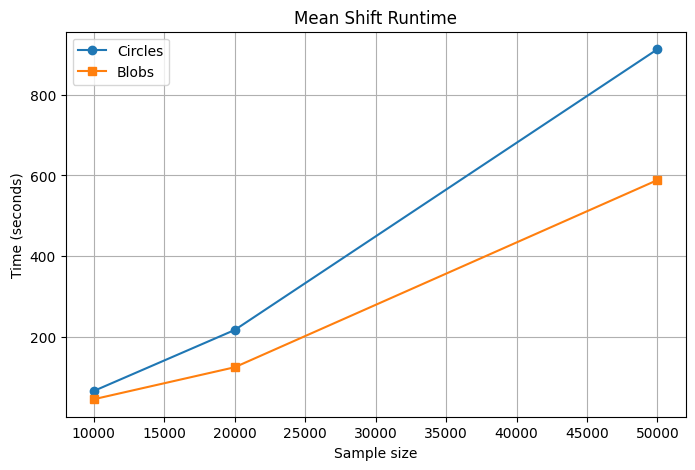

In [ ]:
def plot_results(x, circles_results, blobs_results, title, xlabel, ylabel):
  plt.figure(figsize=(8, 5))
  plt.plot(x, circles_results, label="Circles", marker='o')
  plt.plot(x, blobs_results, label="Blobs", marker='s')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.title(title)
  plt.grid()
  plt.show()

plot_results(sample_sizes, time_results_circles, time_results_blobs,
             "Mean Shift Runtime", "Sample size", "Time (seconds)")

###Побудова альтернативних моделей

Побудуємо кiлька альтернативних моделей шляхом змiни значень параметру bandwidth основної моделi.

In [ ]:
bandwidths = [0.1, 0.25, 0.5, 0.75]
models = [MeanShift(bandwidth=bandwidth) for bandwidth in bandwidths]

###Розрахунок метрик якостi кластеризацiї, реалiзованих в модулi sklearn.metrics, для альтернативних моделей

Для кожної альтернативної моделi розрахуємо метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics, згiдно з варiантом 10: Estimated Number of Clusters, Adjusted Rand Index, Adjusted Mutual Information, Silhouette Coefficient.

Results of Alternative models on datasets
bandwidth=0.10
Circles (10000 samples):
 Estimated Number of Clusters: 59.0000
 Adjusted Rand Index: 0.4900
 Adjusted Mutual Information: 0.4066
 Silhouette Coefficient: 0.2596


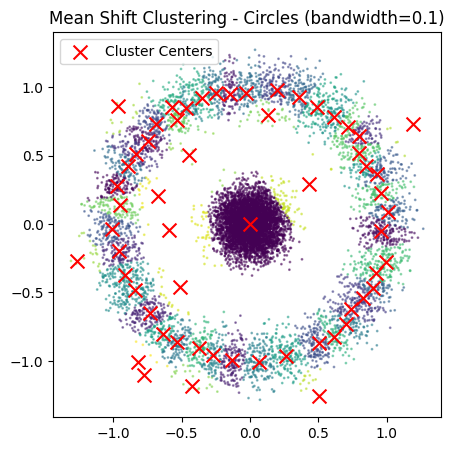

Blobs (10000 samples):
 Estimated Number of Clusters: 430.0000
 Adjusted Rand Index: 0.0180
 Adjusted Mutual Information: 0.3136
 Silhouette Coefficient: 0.2826


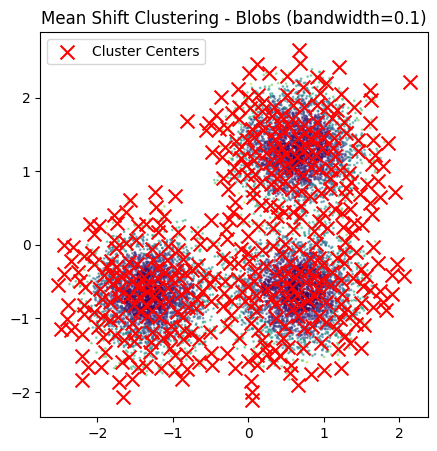

bandwidth=0.25
Circles (10000 samples):
 Estimated Number of Clusters: 19.0000
 Adjusted Rand Index: 0.5282
 Adjusted Mutual Information: 0.4898
 Silhouette Coefficient: 0.5509


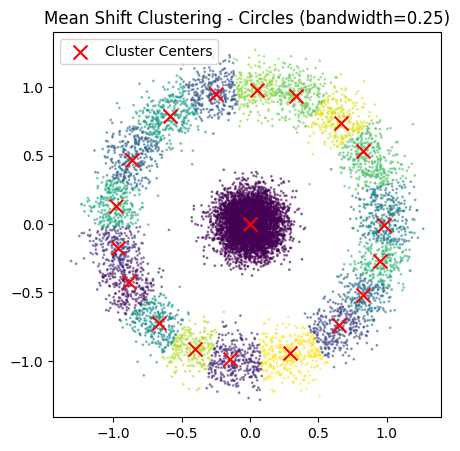

Blobs (10000 samples):
 Estimated Number of Clusters: 10.0000
 Adjusted Rand Index: 0.7664
 Adjusted Mutual Information: 0.7381
 Silhouette Coefficient: 0.2906


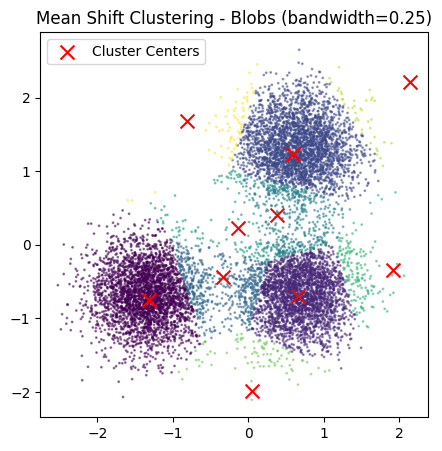

bandwidth=0.50
Circles (10000 samples):
 Estimated Number of Clusters: 10.0000
 Adjusted Rand Index: 0.5558
 Adjusted Mutual Information: 0.5576
 Silhouette Coefficient: 0.5925


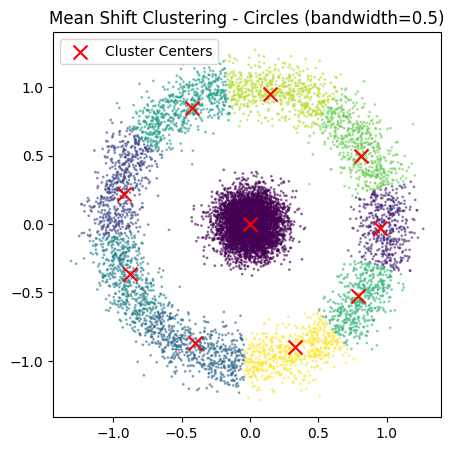

Blobs (10000 samples):
 Estimated Number of Clusters: 4.0000
 Adjusted Rand Index: 0.9707
 Adjusted Mutual Information: 0.9468
 Silhouette Coefficient: 0.5387


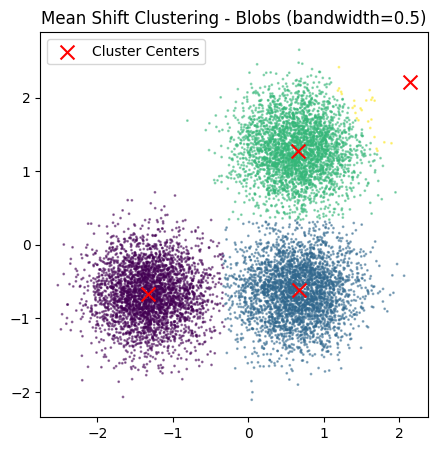

bandwidth=0.75
Circles (10000 samples):
 Estimated Number of Clusters: 1.0000
 Adjusted Rand Index: 0.0000
 Adjusted Mutual Information: 0.0000
 Silhouette Coefficient: nan


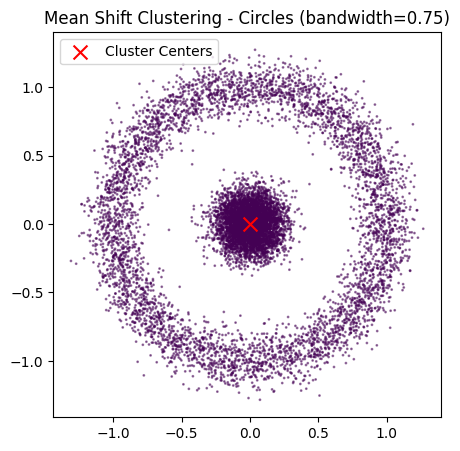

Blobs (10000 samples):
 Estimated Number of Clusters: 3.0000
 Adjusted Rand Index: 0.9750
 Adjusted Mutual Information: 0.9543
 Silhouette Coefficient: 0.6351


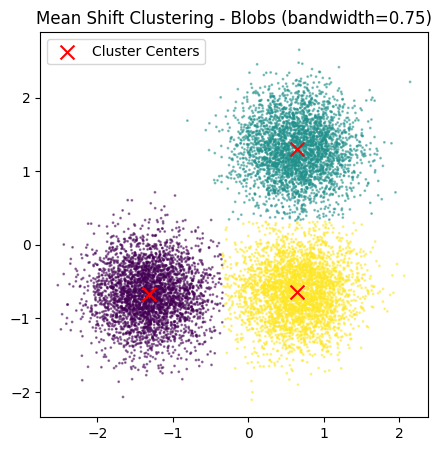

In [ ]:
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    silhouette_score
)

def evaluate(X, labels, true_labels):
  metrics = {}

  metrics["Estimated Number of Clusters"] = len(np.unique(labels))
  metrics["Adjusted Rand Index"] = adjusted_rand_score(true_labels, labels)
  metrics["Adjusted Mutual Information"] = adjusted_mutual_info_score(true_labels, labels)
  if len(np.unique(labels)) > 1:
    metrics["Silhouette Coefficient"] = silhouette_score(X, labels)
  else:
    metrics["Silhouette Coefficient"] = np.nan

  return metrics

results_circles, results_blobs = [], []
print("Results of Alternative models on datasets")
for bandwidth, model in zip(bandwidths, models):
  print(f"bandwidth={bandwidth:.2f}")

  labels = model.fit_predict(X_circles)
  results = evaluate(X_circles, labels, y_circles)
  results_circles.append(results)
  print("Circles (10000 samples):")
  for metric in results:
    print(f" {metric}: {results[metric]:.4f}")

  plot_clustered_data(X_circles, labels, model.cluster_centers_,
                      f"Circles (bandwidth={bandwidth})")

  labels = model.fit_predict(X_blobs)
  results = evaluate(X_blobs, labels, y_blobs)
  results_blobs.append(results)
  print("Blobs (10000 samples):")
  for metric in results:
    print(f" {metric}: {results[metric]:.4f}")

  plot_clustered_data(X_blobs, labels, model.cluster_centers_,
                      f"Blobs (bandwidth={bandwidth})")

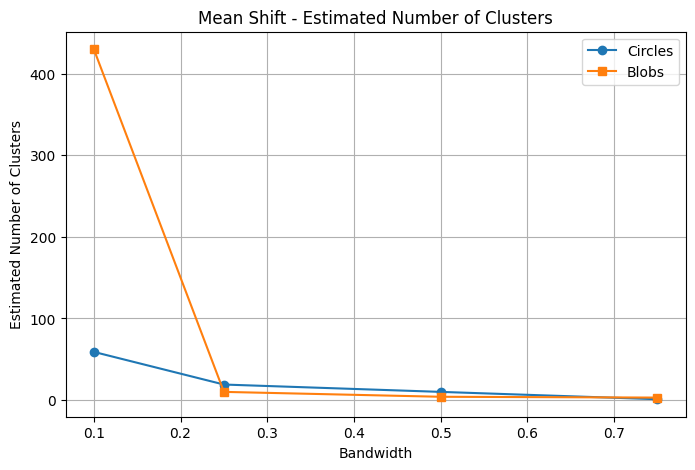

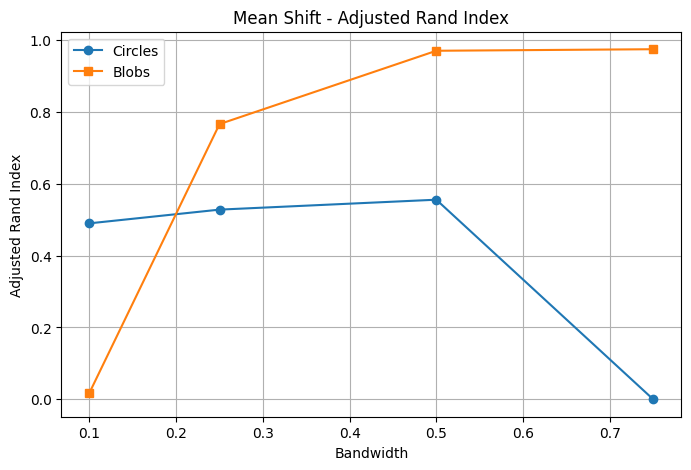

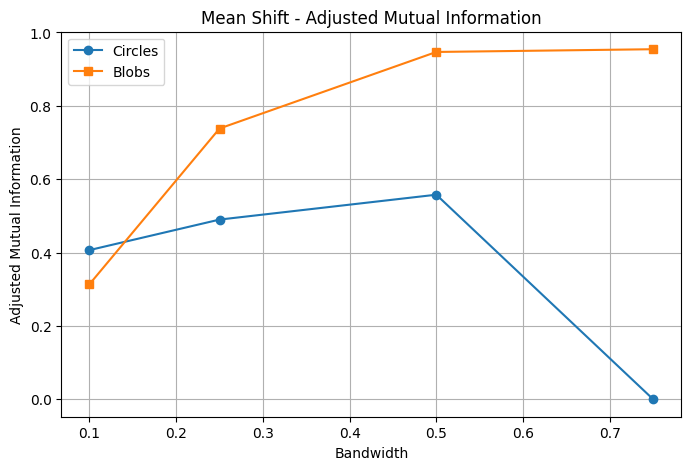

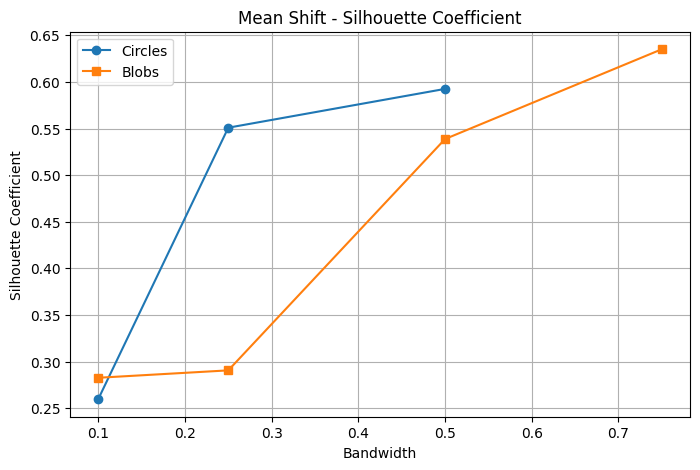

In [ ]:
for metric_name in results_circles[0]:
  circles_data = [result[metric_name] for result in results_circles]
  blobs_data = [result[metric_name] for result in results_blobs]

  plot_results(bandwidths, circles_data, blobs_data,
               f"Mean Shift - {metric_name}", "Bandwidth", metric_name)

###Аналiз результатiв кластеризацiї одним з неформальних методiв


Виконаємо аналiз результатiв кластеризацiї неформальним методом згiдно з варiантом 10: чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

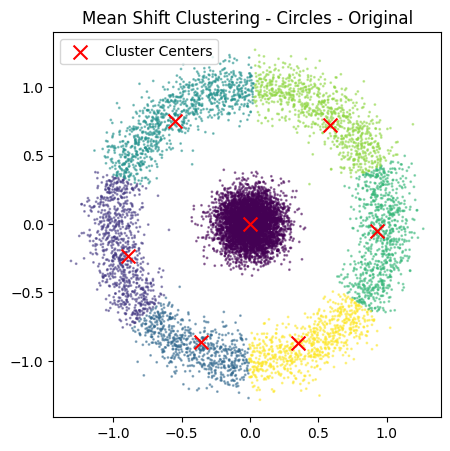

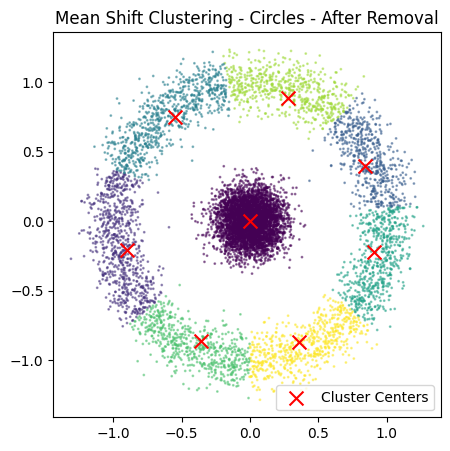

Metrics on full data (Circles):
 Estimated Number of Clusters: 7.0000
 Adjusted Rand Index: 0.5843
 Adjusted Mutual Information: 0.6076
 Silhouette Coefficient: 0.6032
Metrics after removal (Circles):
 Estimated Number of Clusters: 8.0000
 Adjusted Rand Index: 0.5732
 Adjusted Mutual Information: 0.5879
 Silhouette Coefficient: 0.5995


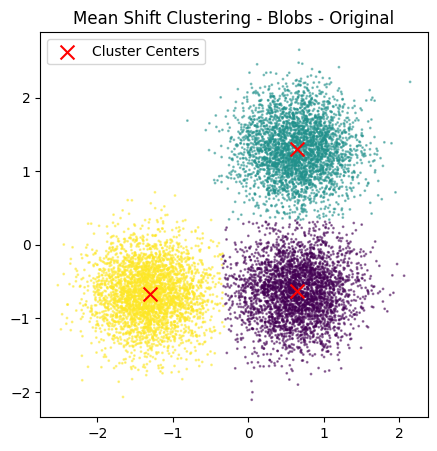

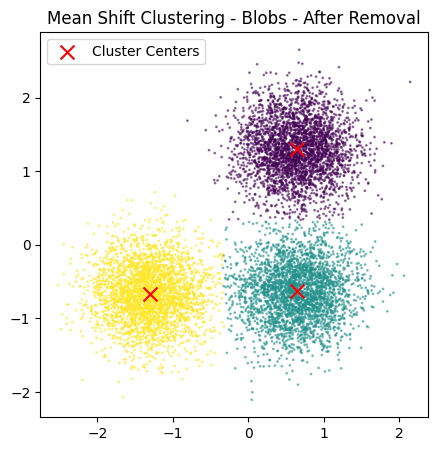

Metrics on full data (Blobs):
 Estimated Number of Clusters: 3.0000
 Adjusted Rand Index: 0.9753
 Adjusted Mutual Information: 0.9546
 Silhouette Coefficient: 0.6351
Metrics after removal (Blobs):
 Estimated Number of Clusters: 3.0000
 Adjusted Rand Index: 0.9739
 Adjusted Mutual Information: 0.9524
 Silhouette Coefficient: 0.6361


In [ ]:
def reduce_data(X, y, removal_fraction=0.1):
  n_remove = int(removal_fraction * len(X))
  idx_remove = np.random.choice(len(X), size=n_remove, replace=False)
  X_reduced = np.delete(X, idx_remove, axis=0)
  y_reduced = np.delete(y, idx_remove, axis=0)
  return X_reduced, y_reduced

def test_stability_after_removal(X, true_labels, dataset_name, removal_fraction=0.1):
  model_full = MeanShift(n_jobs=-1)
  labels_full = model_full.fit_predict(X)
  centers_full = model_full.cluster_centers_

  X_reduced, labels_true_reduced = reduce_data(X, true_labels, removal_fraction)

  model_reduced = MeanShift()
  labels_reduced = model_reduced.fit_predict(X_reduced)
  centers_reduced = model_reduced.cluster_centers_

  plot_clustered_data(X, labels_full, centers_full, f"{dataset_name} - Original")
  plot_clustered_data(X_reduced, labels_reduced, centers_reduced, f"{dataset_name} - After Removal")

  metrics_full = evaluate(X, labels_full, true_labels)
  metrics_reduced = evaluate(X_reduced, labels_reduced, labels_true_reduced)

  print(f"Metrics on full data ({dataset_name}):")
  for metric in metrics_full:
    print(f" {metric}: {metrics_full[metric]:.4f}")

  print(f"Metrics after removal ({dataset_name}):")
  for metric in metrics_reduced:
    print(f" {metric}: {metrics_reduced[metric]:.4f}")

test_stability_after_removal(X_circles, y_circles, "Circles")
test_stability_after_removal(X_blobs, y_blobs, "Blobs")

##Аналіз результатів

Алгоритм MeanShift продемонстрував різну якість кластеризації на двох досліджених наборах даних. Для make_circles найкращі результати були отримані при значенні параметра bandwidth=0.5, де Adjusted Rand Index склав 0.5558, Adjusted Mutual Information - 0.5576, а Silhouette Coefficient - 0.5925. Але навіть за цих умов модель не змогла точно виявити два реальні кластери, що містяться у даних. Імовірною причиною є те, що MeanShift заснований на евристичному пошуку локальних максимумів щільності, і не враховує глобальну форму кластерів.

Для набору make_blobs MeanShift показав значно кращу якість кластеризації. При bandwidth=0.75 алгоритм точно виявив три справжні кластери, досягнувши значень Adjusted Rand Index 0.9750, Adjusted Mutual Information 0.9543 та Silhouette Coefficient 0.6351. Це може бути пояснено тим, що кластери у випадку blobs мають просту і добре розділену структуру з приблизно однаковою щільністю, що є ідеальним випадком для MeanShift.

Щодо швидкодії, MeanShift виявився доволі повільним. Час кластеризації різко зростав із розміром вибірки. Наприклад, для набору make_circles час обробки 10 000 об’єктів склав майже 67 секунд, а для 50 000 - вже понад 900 секунд (15 хв). Схожа тенденція спостерігалась і для blobs, хоч і з меншими значеннями.

Аналіз стабільності кластеризації після випадкового вилучення 10% об'єктів показав помірну стійкість алгоритму для make_circles і високу для make_blobs. У першому випадку кількість кластерів змінилась із 7 до 8, а значення метрик знизились лише незначно, що свідчить про відносну стабільність, хоча результат залишається далеким від ідеального. Натомість для make_blobs кластеризація виявилась надзвичайно стабільною: кількість кластерів збереглась, а метрики змінились у межах статистичної похибки.

Найкращою моделлю кластеризації для make_circles можна вважати конфігурацію з bandwidth=0.5, яка забезпечила найвищу якість серед досліджених варіантів, хоча і не досягла повного відтворення реального розбиття. Для make_blobs найкращим є випадок bandwidth=0.75, оскільки саме ця модель змогла точно відновити три кластери з максимальною якістю класифікації та високим значенням метрики Silhouette Coefficient.

##Висновок

У ході лабораторної роботи було досліджено ефективність алгоритму кластеризації MeanShift на двох наборах даних: make_circles (2 кластери) та make_blobs (3 кластери). Було оцінено якість кластеризації за метриками Adjusted Rand Index, Adjusted Mutual Information, Silhouette Coefficient, а також проаналізовано стабільність кластеризації після видалення 10% випадкових об’єктів та швидкодію методу при збільшенні обсягу даних.

Результати експериментів демонструють, що алгоритм MeanShift добре підходить для задач з чітко вираженими кластерами (як у blobs) і показує високу якість та стабільність, але має суттєві проблеми зі швидкодією та погано справляється з задачами, де кластери мають складну форму, як у circles.